In [108]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random

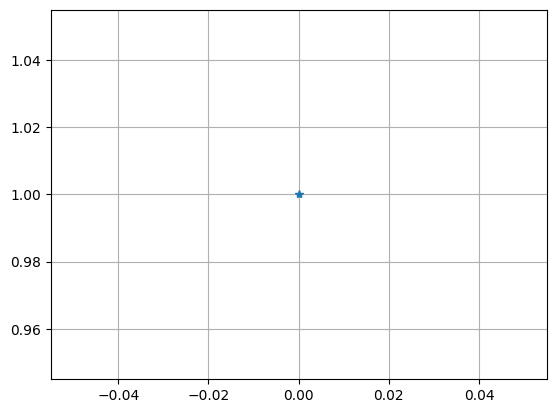

In [109]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

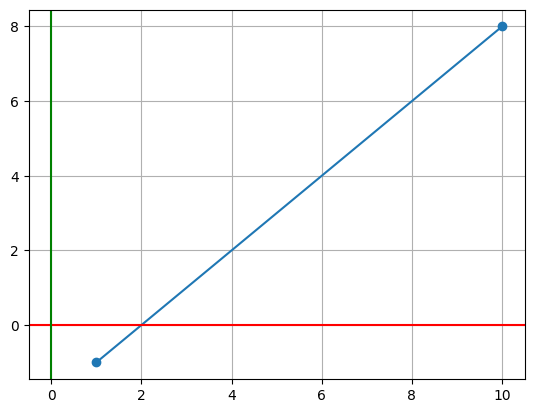

In [110]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

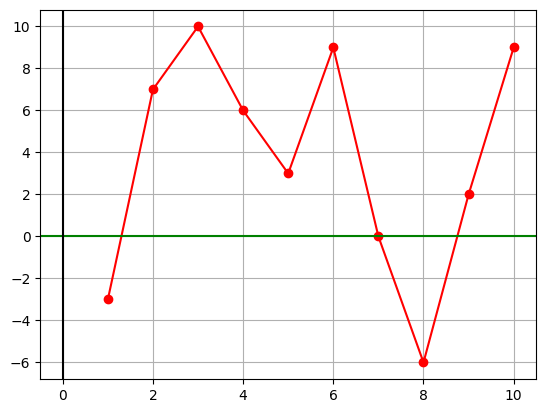

In [111]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

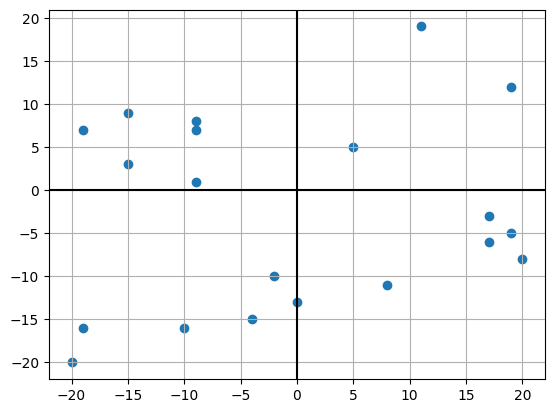

In [112]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()


In [113]:
#cargar un sataset en numpy



In [114]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
          city_consumption = pkl.load(f)
       
          
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [115]:
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
city_consumption
road_consumption
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [116]:
print(manufacturers.dtype)
print(manufacturers.shape)


<U13
(1067,)


In [117]:
print(f"Consumo medio en ciudad: {np.round(np.mean(city_consumption),2):.2f}")
print(f"Coche que mas consume en ciudad: {np.round(np.max(city_consumption),2):.2f}")
print(f"Coche que menos consume en ciudad: {np.round(np.min(city_consumption),2):.2f}")
print(f"Consumo mediana en ciudad: {np.round(np.median(city_consumption),2):.2f}")
print(f"Consumo medio en carretera: {np.round(np.mean(road_consumption),2):.2f}")
print(f"Coche que mas consume en carretera: {np.round(np.max(road_consumption),2):.2f}")
print(f"Coche que menos consume en carretera: {np.round(np.min(road_consumption),2):.2f}")
print(f"Consumo mediana en carretera: {np.round(np.median(road_consumption),2):.2f}")

Consumo medio en ciudad: 13.30
Coche que mas consume en ciudad: 30.20
Coche que menos consume en ciudad: 4.60
Consumo mediana en ciudad: 12.60
Consumo medio en carretera: 9.47
Coche que mas consume en carretera: 20.50
Coche que menos consume en carretera: 4.90
Consumo mediana en carretera: 8.80


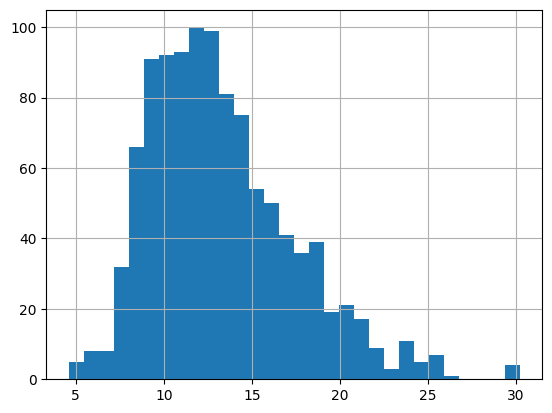

In [118]:
plt.hist(city_consumption, bins=30); # el punto y como final evita que aparezca el array
plt.grid()#bins es la cantidad de barras del histograma

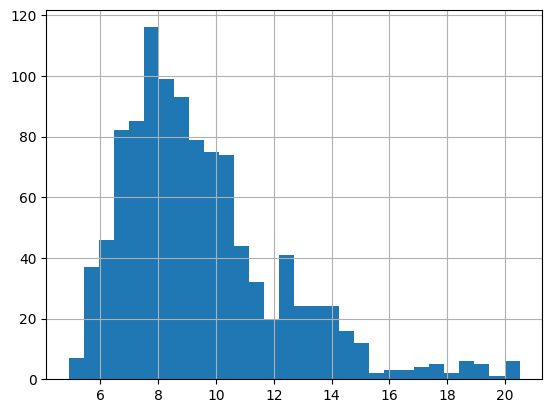

In [119]:
plt.hist(road_consumption, bins=30);
plt.grid()

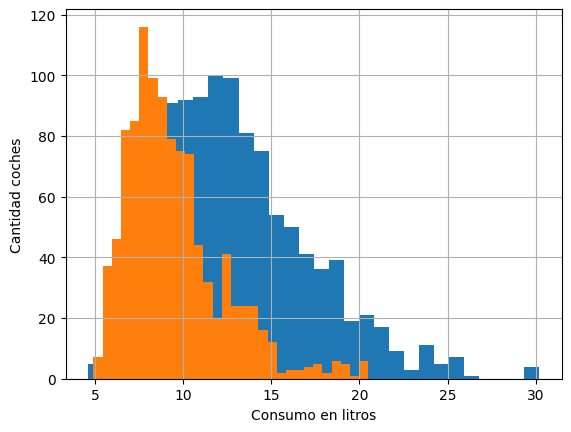

In [120]:
#superponer los graficos
plt.hist(city_consumption, bins=30);
plt.hist(road_consumption, bins=30);
plt.xlabel("Consumo en litros")
plt.ylabel("Cantidad coches")
plt.grid()

In [121]:
np.quantile(a = city_consumption, q= 0.25, interpolation = "lower") #primer quartil
np.quantile(a = city_consumption, q= 0.5, interpolation = "lower")  #segundo quartil 
np.quantile(a = city_consumption, q= 0.75, interpolation = "lower") #te4rmer quartil
np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower")

array([10.2, 12.6, 15.5], dtype=float32)

In [122]:
# Filtros: mascara booleana
city_consumption[city_consumption >= 26]
#np.where

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [123]:
#Rango
print(f"Rango consumo ciudad: {round(np.max(city_consumption) - np.min(city_consumption),2):.2f}") #con redondeo y dos decimales
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")


Rango consumo ciudad: 25.60
Rango consumo carretera: 15.600000381469727


In [124]:
#rango quartiles rango intercuartilico IQR
# 1,5 veces mas alla del iqr se consideran valores anomalos o outliers
q1 = np.quantile (a= city_consumption, q= 0.25, interpolation = "lower")
q3 = np.quantile (a= city_consumption, q= 0.75, interpolation = "lower")
iqr = q3-q1
print(f"Rango intercuartilico IQR: {iqr}")

Rango intercuartilico IQR: 5.300000190734863


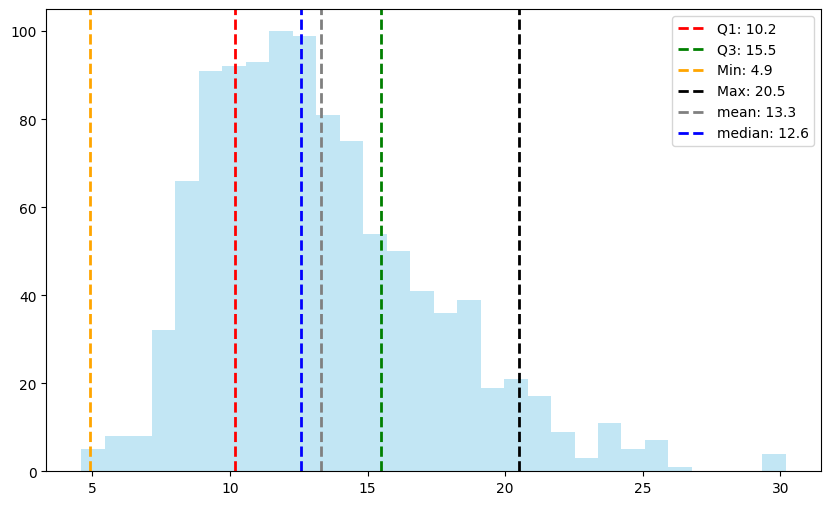

In [125]:
#pintar media, mediana, q1, q3, min, max en un histograma
c_mini = np.min(road_consumption)
c_maxi = np.max(road_consumption)
c_media = np.mean(city_consumption)
c_mediana = np.median(city_consumption)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=30, color='skyblue', alpha=0.5)
plt.axvline(q1, color='red', linestyle= 'dashed', linewidth=2, label=(f"Q1: {q1:.1f}"))
plt.axvline(q3, color='green', linestyle= 'dashed', linewidth=2, label=(f"Q3: {q3:.1f}"))
plt.axvline(mini, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Min: {c_mini:.1f}"))
plt.axvline(maxi, color='black', linestyle= 'dashed', linewidth=2, label=(f"Max: {c_maxi:.1f}"))
plt.axvline(c_media, color= 'grey', linestyle= 'dashed', linewidth=2, label=(f"mean: {c_media:.1f}"))
plt.axvline(c_mediana, color= 'blue', linestyle= 'dashed', linewidth=2, label=(f"median: {c_mediana:.1f}"))
plt.legend() 
plt.show()

#plt.grid()



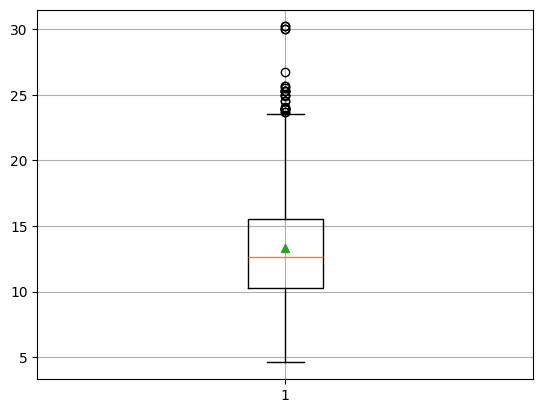

In [126]:
#boxplot calcula y muestra los valores IQR, max, min,,mediana
#plt.boxplot(city_consumption); #showmeans= True me mostraría tambien la media
plt.boxplot(city_consumption, showmeans=True)
plt.grid()

In [127]:
#Filtrar usando percentiles
print(np.percentile(city_consumption, 10)) #es lo mismo uno que otro
print(np.quantile(city_consumption, 0.1))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {round(percentil_10 ,2):.2f}") #aca se ve mejor el redondeo y como se muestra
print(f"percentil 90: {percentil_90}")


#coches que menos consumen
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]
#coches que mas consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {round(np.mean(coches_menor_consumo),2):.2f}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {round(np.mean(coches_mayor_consumo),2):.2f}")

8.7
8.7
percentil 10: 8.70
percentil 90: 18.799999237060547
10 % coches menor consumo
media: 7.83
10 % coches mayor consumo
media: 21.57


In [129]:
#Varianza: Que dispersion tienen los datos con respecto a la media
varianza = np.var(city_consumption)
print(f"Varianza: {varianza}")

#Desviación estandar: raiz cuadrada de la varianza
desviacion = np.std(city_consumption)
print(f"Desviacion estandar: {desviacion:.2f}")


Varianza: 16.804515838623047
Desviacion estandar: 4.10
